Enter no of amenity:4
Enter amenity names:hospital
Enter amenity names:bank
Enter amenity names:school
Enter amenity names:pharmacy
                 osmid                                           geometry  \
245665571    245665571                          POINT (72.89361 19.06114)   
3206033563  3206033563                          POINT (72.89040 19.05851)   
3289519861  3289519861                          POINT (72.88295 19.08131)   
3289526261  3289526261                          POINT (72.88193 19.08115)   
3289562513  3289562513                          POINT (72.88338 19.07729)   
3532111661  3532111661                          POINT (72.88046 19.06275)   
3532119818  3532119818                          POINT (72.88179 19.06348)   
3532122516  3532122516                          POINT (72.88422 19.06377)   
3532124714  3532124714                          POINT (72.87812 19.06939)   
3532124715  3532124715                          POINT (72.87813 19.06928)   
3532124717  353212471

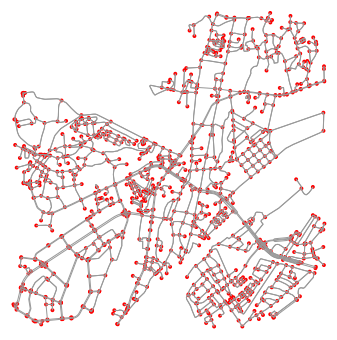

Enter current time:1
Enter 0 if you want to search by name and 1 if by index1
Enter Initial Node:1
Enter Final node:23
(19.0614346, 72.8853039)
(19.0675393, 72.8889522)
                       y              x       osmid          highway  \
2246471679  2.108970e+06  277584.086596  2246471679              NaN   
2246471684  2.108967e+06  277470.254143  2246471684              NaN   
2622177286  2.110424e+06  276529.172264  2622177286              NaN   
2622177289  2.110581e+06  276643.530263  2622177289  traffic_signals   
2622177290  2.110600e+06  276660.696664  2622177290  traffic_signals   
...                  ...            ...         ...              ...   
2246471666  2.108918e+06  277667.121415  2246471666              NaN   
2246471668  2.108933e+06  277539.158866  2246471668              NaN   
7402196980  2.111820e+06  277372.567239  7402196980              NaN   
2622177271  2.109598e+06  276372.217052  2622177271              NaN   
2622177275  2.110007e+06  276435.087239

In [5]:
#Graph Creation ,praeparing traffic matrix and taking user input

import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import folium
from pyproj import Proj
import webbrowser
import osmapi as osm
from geopy.geocoders import Nominatim

# get a graph for some city
api = osm.OsmApi()
graph=ox.graph_from_point((19.076090,72.877426 ), distance=2000,network_type='drive')
g1=graph
a=input("Enter no of amenity:")
a=int(a)
am=[]
for i in range (0 , a):
    st=input("Enter amenity names:")
    am.append(st)
am1 = ox.pois_from_point((19.076090,72.877426), amenities=am,distance=2000)
print(am1)
"""am2=ox.pois_from_point((19.076090,72.877426),amenities=["school"],distance=2000)
am=ox.pois.pois_from_point((19.076090,72.877426), {'amenity':True},distance=2000)"""
#print(am)
ox.plot_graph(graph,node_color='r')
graph_proj = ox.project_graph(graph)
node,edge=ox.graph_to_gdfs(graph, nodes=True, edges=True)
nodes, edges = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
C=pd.Series.tolist(nodes.y)
C1=pd.Series.tolist(node.y)
D1=pd.Series.tolist(node.x)
ti=input("Enter current time:")
ai=input("Enter 0 if you want to search by name and 1 if by index:")
start=(input("Enter Initial Node:"))
end=(input("Enter Final node:"))
if ai=="1":
    start=int(start)
    end=int(end)
    

if ai=="0":
    o=ox.geocode(start)
    d=ox.geocode(end)
else:
    o=(C1[start],D1[start])
    d=(C1[end],D1[end])
  
print(o)
print(d)

print(nodes)
array=np.random.randint(99,100000000,size=(12,len(edges)))

print(array)
"""f=open("output2.txt","r")
l=[]
a = f.read()
sp = a.splitlines()
sp = list(map(int,sp))    
print(sp)"""
"""edges['test1'] = np.random.randint(0,10000000, edges.shape[0])
edge['test1'] = np.random.randint(0,100000000, edges.shape[0])"""
print(type( edges.shape[0]))
edges['test1'] = np.asarray(list(array[int(ti)]),dtype='int')
edge['test1'] = np.asarray(list(array[int(ti)]),dtype='int')
"""print(edges['test1'])
print(nodes.head())
print(type(nodes))
print(edges['length'])
nodes.to_csv('node1.csv')
edges.to_csv('edge2.csv')"""
B=pd.Series.tolist(nodes.osmid)
#fp=open('nodew.txt','r+')
lim=[]


for i in range (0,len(B)):
    lim.append(random.choice([20,19,17,1,200,100,0,1]))

print(lim)
n=len(B)
print(n)
myProj = Proj("+proj=utm +zone=23K, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")



In [6]:
na=am1.name

print(type(na))

na=na.to_list()
print(na)
print(na)
no=am1.amenity
no=no.to_list()
print(no)
#print(am1.osmid)
#print(am1.columns)
mo= ox.plot_graph_folium(graph, popup_attribute='name', edge_width=2,edge_color='green')
j=0
nc=['blue' if i==am[0] else "green"  if i==am[1] else "pink" if i==am[2] else "red"  for i in no]
print(nc)

ini=0
for i in na:
        
        try:
            o1=ox.geocode(i)
        except Exception as ve:
            print(no[ini])
        folium.Marker(location=o1,icon=folium.Icon(color=nc[ini]),popup=i).add_to(mo)
        ini=ini+1
        

mo.save("amenity1.html")
a1=str(o[0])
a1+=","
a1+=str(o[1])
print("a1=")
print(a1)
a2=str(d[0])
a2+=","
a2+=str(d[1])
print("a2=")
print(a2)

#print(C1)
#print(D1)
D=pd.Series.tolist(nodes.x)
M=pd.Series.tolist(nodes.osmid)
geolocator = Nominatim(user_agent="geoapiExercises")
def country(coord):
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    li= list(address.items()) 
    return str(li[0])
a1=country(str(a1))
a2=country(str(a2))
print(a1)
print(a2)
#lis=[country(str(a)+","+str(b)) for a,b in zip(C1,D1)]
#print(lis)

#for i in range (0,len(nodes)):
    
#print(nm)
     


#graph_proj.add_edge(B[0],B[1],length=13)

print(len(B))
print(B)
#graph_map = ox.plot_graph_folium(graph, edge_width=2,edge_color='green')



A = nx.adjacency_matrix(graph_proj,weight='length')
print(len(graph))
print(A)
print(type(A))
print(type(A.todense()))
print(A.todense())
#np.savetxt("foo.csv", A.todense(), delimiter=",")
Ac=A.tocoo()
print(type(Ac))
#print(Ac)
l1=Ac.row
l2=Ac.col
l3=Ac.data
#print(l1)
#fs=open('feek.txt','r+')
#l=["1","2","3","4","5","6","7","8"]

ranh=""
sanh=""
sr='1'
for i in range (0,len(l3)):
    a=(lim[l1[i]]+lim[l2[i]])/2
    st=str(a)
    sanh+=st
    sanh+=" "
print("Congestion matrix is")
print(sanh)


    
print("Traffic matrix is")    
print(edge['test1'])

<class 'pandas.core.series.Series'>
['Maa hospital', 'maa hospital', 'Ritesh Medical', 'City Medical Centre', nan, 'state bank of india', 'v care hospital intensive& unit care', 'Allahabad Bank', 'arpan nursing home', 'noor communication', 'fauziya hospital', 'arayan hospital', 'American School of Bombay', 'Ambani School', nan, 'Kurla Municipal Hospital', 'Arya Vidya Mandir', 'Mount Litera School International', 'Asian Heart Institute', 'FAB (First Abu Dhabi Bank)', 'Bandhan Bank', 'Allahabad Bank', nan, 'Asian Heart Institute and Research Center', 'Kohinoor Hospital Blood Bank', 'Sushila Hospital-Icu and Maternity', 'V Care Hospital and Icu', 'Aryan Hospital and Iccu - Kurla-Mumbai', 'Hamidani Laser Vision Centre', 'Durga Maternity and Surgical Nursing Home', 'Despande Nursing Home', 'Fauziya Hospital', 'Apex Kidney Care Pvt. Ltd.', 'Prarushi Healthcare Pvt Ltd / Kusumesh Chandra Maternity Hospital', 'Kalina Hospital', 'Niron Hospital and Research Center', 'Kohinoor Hospitals Pvt Ltd'

<class 'str'>
shortest distance based on length:


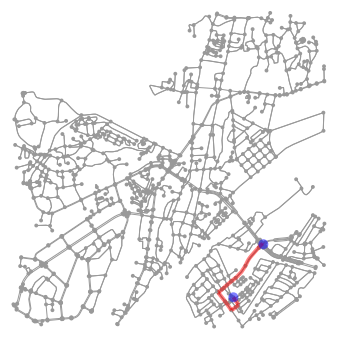

[(2246471684, 6569435666), (6569435666, 2246471656), (2246471656, 4357309669), (4357309669, 2246471647), (2246471647, 1654348910), (1654348910, 3463796101), (3463796101, 245666164), (245666164, 2246471728), (2246471728, 7380517080), (7380517080, 4264430257), (4264430257, 1367093112), (1367093112, 2246471803), (2246471803, 2246471851), (2246471851, 1232644620), (1232644620, 2804444332), (2804444332, 2804441140), (2804441140, 2804441153), (2804441153, 2804441145)]
[2246471684, 6569435666, 2246471656, 4357309669, 2246471647, 1654348910, 3463796101, 245666164, 2246471728, 7380517080, 4264430257, 1367093112, 2246471803, 2246471851, 1232644620, 2804444332, 2804441140, 2804441153, 2804441145]
(19.0614346, 72.8853039)
(19.0612224, 72.8854319)
(19.0605846, 72.8859093)
(19.0603067, 72.8855997)
(19.0599369, 72.8850696)
(19.0607299, 72.8844858)
(19.0609601, 72.8843002)
(19.0619851, 72.88346)
(19.0623332, 72.8839101)
(19.0625216, 72.8841388)
(19.0628649, 72.8845412)
(19.0632436, 72.8850141)
(19.063

In [10]:
orig_xy1=o   
#target_xy1 = (C[end], D[end])
target_xy1=d
orig_node = ox.get_nearest_node(graph, o, method='euclidean')
target_node = ox.get_nearest_node(graph, d, method='euclidean')

#route2=nx.shortest_simple_paths(G=graph_proj, source=orig_node, target=target_node, weight='length')
flag=1
try:
   route22 = nx.shortest_path(G=graph, source=orig_node, target=target_node, weight='length')
except nx.NetworkXNoPath as ke:
    print("Path not found in given graph")
    goi=ox.graph_from_point(d, distance=2000,network_type='drive')
    nod,ed=ox.graph_to_gdfs(goi, nodes=True, edges=True)
    Bi=pd.Series.tolist(nod.osmid)
    ori=ox.get_nearest_node(goi, o, method='euclidean')
    ro=nx.shortest_path(G=goi,source=ori,target=target_node,weight='length')
    fig, ax = ox.plot_graph_route(goi, ro, origin_point=orig_xy1, destination_point=target_xy1,save=True,file_format='png',filename='length_based')
    m=ox.plot_route_folium(goi, ro,route_color='green')
    C11=pd.Series.tolist(nod.y)
    D11=pd.Series.tolist(nod.x)
    flag=0
    print(ro)
    for i in range (0,len(ro)):
      b=ro[i]
      if b in Bi:
        a=Bi.index(b)
        om=(C11[a],D11[a])
        s=""
        s+=str(C11[i])
        s+=","
        s+=str(D11[i])
        na=""
        na+=country(s)
        print(om)
        folium.Marker(location=om,popup=na,icon=folium.Icon(color='black')).add_to(m)
    folium.Marker(location=o,
              icon=folium.Icon(color='red'),popup=a1).add_to(m)
    folium.Marker(location=d,
              icon=folium.Icon(color='blue'),popup=a2).add_to(m)
    m.save(" distance1.html " )
    
#length = nx.shortest_path_length(G=graph, source=orig_node, target=target_node, weight='length')
#print("length=")
#print(length)
#fig, ax = ox.plot_graph_route(graph_proj, route2, origin_point=orig_xy1, destination_point=target_xy1,save=True,file_format='png',filename='length_based')
#route3=nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='wei')
if flag==1:
   print("shortest distance based on length:")
   fig, ax = ox.plot_graph_route(graph, route22, origin_point=orig_xy1, destination_point=target_xy1,save=True,file_format='png',filename='length_based')
#fig, ax = ox.plot_graph_route(graph_proj, route3, origin_point=orig_xy1, destination_point=target_xy1,save=True,file_format='png',filename='length_based')
   m=ox.plot_route_folium(graph, route22,route_color='green')
   o1=o
   o2=d
   print(route22)
   for i in range (0,len(route22)):
      b=route22[i]
      if b in B:
        a=B.index(b)
        om=(C1[a],D1[a])
        s=""
        s+=str(C1[i])
        s+=","
        s+=str(D1[i])
        na=""
        na+=country(s)
        print(om)
        folium.Marker(location=om,popup=na,icon=folium.Icon(color='black')).add_to(m)
   folium.Marker(location=o1,
              icon=folium.Icon(color='red'),popup=a1).add_to(m)
   folium.Marker(location=o2,
              icon=folium.Icon(color='blue'),popup=a2).add_to(m)
   m.save(" distance1.html " )

Printing shortest distance based on traffic


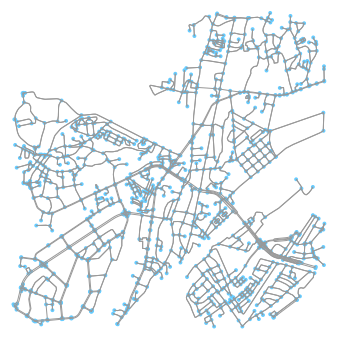

0       66154370
1       83855013
2       59592231
3       98437790
4       15949910
          ...   
2600    51215574
2601    27707795
2602      135130
2603    68167890
2604    62982630
Name: test1, Length: 2605, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
  (0, 8)	41.628
  (0, 363)	34.945
  (0, 1087)	58.225
  (1, 182)	27.161
  (2, 775)	84.118
  (2, 891)	7.633
  (3, 4)	26.154000000000003
  (3, 526)	105.446
  (4, 307)	25.618000000000002
  (4, 483)	10.062
  (5, 6)	295.287
  (5, 299)	128.03699999999998
  (5, 890)	16.597
  (6, 7)	182.989
  (6, 371)	161.472
  (6, 662)	14.161
  (7, 9)	378.57199999999995
  (7, 371)	105.093
  (7, 601)	12.477
  (8, 0)	41.628
  (8, 182)	95.524
  (8, 364)	34.068
  (9, 10)	174.72899999999998
  (9, 810)	60.698
  (10, 12)	129.264
  :	:
  (1080, 182)	87.06800000000001
  (1080, 362)	137.404
  (1080, 455)	45.199
  (1080, 1075)	49.394
  (1081, 1079)	88.363
  (1082, 562)	161.753
  (1082, 762)	181.74399999999997
  (1082, 786)	30.7

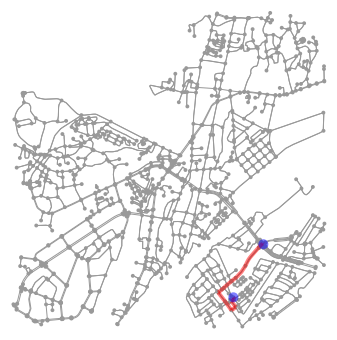

[(2246471684, 6569435666), (6569435666, 6569435667), (6569435667, 4357309669), (4357309669, 2246471647), (2246471647, 1654348910), (1654348910, 3463796101), (3463796101, 245666164), (245666164, 2246471728), (2246471728, 7380517080), (7380517080, 4264430257), (4264430257, 1367093112), (1367093112, 2246471803), (2246471803, 2246471851), (2246471851, 1232644620), (1232644620, 2804444332), (2804444332, 2804441140), (2804441140, 2804441153), (2804441153, 2804441145)]
[(2246471684, 6569435666), (6569435666, 6569435667), (6569435667, 4357309669), (4357309669, 2246471647), (2246471647, 1654348910), (1654348910, 3463796101), (3463796101, 245666164), (245666164, 2246471728), (2246471728, 7380517080), (7380517080, 4264430257), (4264430257, 1367093112), (1367093112, 2246471803), (2246471803, 2246471851), (2246471851, 1232644620), (1232644620, 2804444332), (2804444332, 2804441140), (2804441140, 2804441153), (2804441153, 2804441145)]
[(2246471684, 6569435666), (6569435666, 2246471656), (2246471656, 

In [8]:
print("Printing shortest distance based on traffic")

"""start=int(input("Enter Initial Node:"))
end=int(input("Enter Final node:"))"""
graph = ox.gdfs_to_graph(node, edge)
graph_proj = ox.project_graph(graph)

ox.plot_graph(graph)
node,edge=ox.graph_to_gdfs(graph, nodes=True, edges=True)
nodes, edges = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
print(edges['test1'])
B=pd.Series.tolist(nodes.osmid)
C=pd.Series.tolist(nodes.y)

D=pd.Series.tolist(nodes.x)

A = nx.adjacency_matrix(graph_proj,weight='length')
print(type(edges['length']))
print(type(edges['test1']))
C3= nx.adjacency_matrix(graph_proj,weight='test1')
Ap=C3.tocoo()
print(A)

l1=Ap.row
l2=Ap.col
l3=Ap.data
print(Ap)
print("l1")
print(l1)
print("l2")
print(l2)
print(l3)


"""f=open('congestion.txt',"w")
#o=open('output2.txt',"w")
for i in range (0,len(edges['test1'])):
    f.write(str(l1[i])+" "+str(l2[i])+" "+str(l3[i]))
    f.write("\n")"""
    
#orig_xy1 = (C[start],D[start])
#a=B[start]
#print(a)
o1=o
o3=d

orig_xy1=o   
#target_xy1 = (C[end], D[end])
target_xy1=d
    
#target_xy1 = (C[end], D[end])
#orig_node = ox.get_nearest_node(graph, orig_xy1, method='euclidean')
print(orig_node)
flag=1
#target_node = ox.get_nearest_node(graph, target_xy1, method='euclidean')
try:
   route2 = nx.shortest_path(G=graph, source=orig_node, target=target_node, weight='test1')
except nx.NetworkXNoPath as ke:
    print("Path not found in given graph")
    goi=ox.graph_from_point(d, distance=2000,network_type='drive')
    nod,ed=ox.graph_to_gdfs(goi, nodes=True, edges=True)
    Bi=pd.Series.tolist(nod.osmid)
    ori=ox.get_nearest_node(goi, o, method='euclidean')
    ro=nx.shortest_path(G=goi,source=ori,target=target_node,weight='test1')
    fig, ax = ox.plot_graph_route(goi, ro, origin_point=orig_xy1, destination_point=target_xy1,save=True,file_format='png',filename='length_based')
    m=ox.plot_route_folium(goi, ro,route_color='blue')
    C11=pd.Series.tolist(nod.y)
    D11=pd.Series.tolist(nod.x)
    flag=0
    print(ro)
    for i in range (0,len(ro)):
      b=ro[i]
      if b in Bi:
        a=Bi.index(b)
        om=(C11[a],D11[a])
        s=""
        s+=str(C11[i])
        s+=","
        s+=str(D11[i])
        na=""
        na+=country(s)
        print(om)
        folium.Marker(location=om,popup=na,icon=folium.Icon(color='black')).add_to(m)
    folium.Marker(location=o,
              icon=folium.Icon(color='red'),popup=a1).add_to(m)
    folium.Marker(location=d,
              icon=folium.Icon(color='blue'),popup=a2).add_to(m)
    m.save(" traffic1.html " )
    
#length = nx.shortest_path_length(G=graph, source=orig_node, target=target_node, weight='length')
#print("length=")
#print(length)
#fig, ax = ox.plot_graph_route(graph_proj, route2, origin_point=orig_xy1, destination_point=target_xy1,save=True,file_format='png',filename='length_based')
#route3=nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='wei')
if flag==1:
  route2=nx.shortest_path(G=graph, source=orig_node, target=target_node, weight='test1')
  length = nx.shortest_path_length(G=graph, source=orig_node, target=target_node, weight='test1')
  print("Time=")
  print(length)
  #route2 = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='test1')

  print(route2)
  print(type(route2[0]))
  #fig, ax = ox.plot_graph_route(graph_proj, route2, origin_point=orig_xy1, destination_point=target_xy1,save=True,file_format='png',filename='length_based')
  #route3=nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='wei')

  fig, ax = ox.plot_graph_route(graph, route2, origin_point=o, destination_point=d,save=True,file_format='png',filename='time_based')


  #print(ec)
  m1 = ox.plot_route_folium(g1, route2, route_color='blue')
  m2 = ox.plot_route_folium(g1, route2, route_color='blue')
  m3=ox.plot_route_folium(g1,route22,route_map=m2, route_color='green')
  folium.Marker(location=o,
              icon=folium.Icon(color='red'),popup=a1).add_to(m3)
  folium.Marker(location=d,
              icon=folium.Icon(color='blue'),popup=a2).add_to(m3)
  m3.save("distance1+traffic1.html")
 
  for i in range (0,len(route2)-1):
     b=route2[i]
     c=route2[i+1]
     if b in B:
       a=B.index(b)
       k=B.index(c)
     
      
       om=(C[a],D[a])
      
       o2=(C[k],D[k])
       e1=(C1[a],D1[a])
      
       e2=(C1[k],D1[k])
       
       l=[]
       l.append(e1)
       l.append(e2)
       orig_xy1=om
       target_xy1=o2
       orig_node = ox.get_nearest_node(graph, orig_xy1, method='euclidean')
       target_node = ox.get_nearest_node(graph, target_xy1, method='euclidean')
       length = nx.shortest_path_length(G=graph, source=orig_node, target=target_node, weight='test1')
      #le.append(length)
       if length>10000000:
        #print(length)
        #print("a=")
        #print(a)
        #print(k)  
         folium.PolyLine(l, color="red", weight=8, opacity=1).add_to(m1)
  print(route2)
  for i in range (0,len(route2)):
    b=route2[i]
    if b in B:
      a=B.index(b)
      om=(C1[a],D1[a])
      s=""
      s+=str(C1[i])
      s+=","
      s+=str(D1[i])
      na=""
      na+=country(s)
      print(o)
      folium.Marker(location=om,popup=na,icon=folium.Icon(color='black')).add_to(m1)
    
#length = nx.shortest_path_length(G=graph, source=orig_node, target=target_node, weight='test1')

        
      
       
  print(o1)
  print(type(B[0]))

  folium.Marker(location=o,
              icon=folium.Icon(color='red'),popup="start").add_to(m1)
  folium.Marker(location=d,
              icon=folium.Icon(color='blue'),popup="end").add_to(m1)
  m1.save(" traffic1.html " )

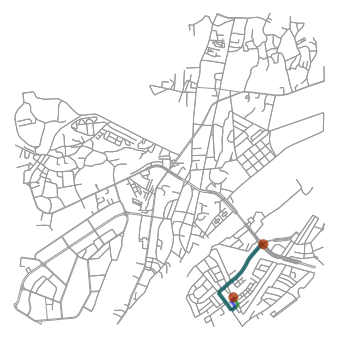

In [11]:
rc1 = ['b'] * (len(route2) - 1)
rc2 = ['g'] * len(route22)
rc = rc1 + rc2
nc = ['g', 'g', 'r', 'r']
fig, ax = ox.plot_graph_routes(g1, [route2, route22], route_color=rc, orig_dest_node_color=nc, node_size=0)
